In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("Dengue_dataset.csv")
print("--------------------------------- ---------------------")
print("================ 1. Data Selection ===================")
print("------------------------------------------------------")
print()
print(data_frame.head(20))

--------------------------------- ---------------------
================ 1. Data Selection ===================
------------------------------------------------------

     temp    wbc  headche  pain_eyes  joint_muscle  metallic_taste  appetite  \
0   100.0   5.00        2          0             1               1         1   
1   104.0   1.00        1          1             2               0         0   
2   104.0   5.00        0          0             1               1         1   
3   101.0  11.00        2          1             1               0         0   
4   101.0   3.64        2          0             1               0         0   
5   104.0   3.64        2          0             1               0         0   
6   104.0   3.64        2          0             1               1         0   
7   103.5   2.20        2          1             1               1         0   
8   103.0   3.64        2          1             2               0         0   
9   101.0   3.64        2        

In [3]:
#======================= PREPROCESSING =========================

#==== CHECKING MISSIMG VALUES =====
 
print("-----------------------------------------------------------")
print("=============== 2. Checking Missing Values ================")
print("-----------------------------------------------------------")
print()
print(data_frame.isnull().sum())

-----------------------------------------------------------
=============== 2. Checking Missing Values ================
-----------------------------------------------------------

temp              0
wbc               0
headche           0
pain_eyes         0
joint_muscle      0
metallic_taste    0
appetite          0
addominal         0
vomiting          0
diarrhoea         0
HB                0
hematocri         0
platelet          0
target            0
dtype: int64


array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'wbc'}>,
        <AxesSubplot:title={'center':'headche'}>,
        <AxesSubplot:title={'center':'pain_eyes'}>],
       [<AxesSubplot:title={'center':'joint_muscle'}>,
        <AxesSubplot:title={'center':'metallic_taste'}>,
        <AxesSubplot:title={'center':'appetite'}>,
        <AxesSubplot:title={'center':'addominal'}>],
       [<AxesSubplot:title={'center':'vomiting'}>,
        <AxesSubplot:title={'center':'diarrhoea'}>,
        <AxesSubplot:title={'center':'HB'}>,
        <AxesSubplot:title={'center':'hematocri'}>],
       [<AxesSubplot:title={'center':'platelet'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

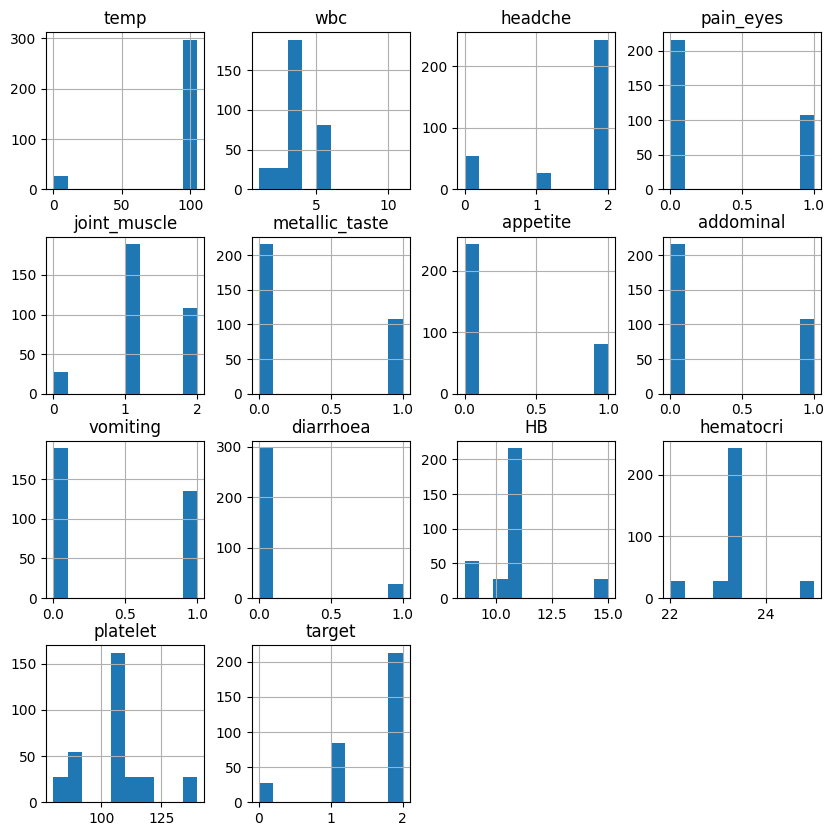

In [4]:
data_frame.hist(figsize=(10, 10))

In [5]:
#===================== FEATURE SELECTION ==================================


x=data_frame.drop('target',axis=1)
y=data_frame['target']

print("====================================================")
print("----------------- 3. Chi-Square --------------------")
print("====================================================")
print()


chi2_features = SelectKBest(chi2, k = 10)
x_kbest= chi2_features.fit_transform(x, y)

print("Total no of original Features :",x.shape[1])
print()
print("Total no of reduced Features  :",x_kbest.shape[1])
print()


----------------- 3. Chi-Square --------------------

Total no of original Features : 13

Total no of reduced Features  : 10



In [6]:
#===================== DATA SPLITTING ====================================

#==== TEST AND TRAIN ====


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

print("====================================================")
print("---------------- 4. Data Splitting -----------------")
print("====================================================")
print()
print("Total number of data's in input         :",data_frame.shape[0])
print()
print("Total number of data's in training part :",X_train.shape[0])
print()
print("Total number of data's in testing part  :",X_test.shape[0])
print()


---------------- 4. Data Splitting -----------------

Total number of data's in input         : 324

Total number of data's in training part : 226

Total number of data's in testing part  : 98



In [7]:
#===================== CLASSIFICATION====================================


#=== RANDOM FOREST ===

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf = RandomForestClassifier(n_estimators = 10) 
 
#fitting the model
rf.fit(X_train, y_train) 

#predict the model
Y_pred_rf = rf.predict(X_test)

print("=================================================")
print("----------------- 1.Random Forest  --------------")
print("=================================================")
print()

accu_rf= metrics.accuracy_score(Y_pred_rf,y_test)*100

cm_rf=metrics.confusion_matrix(y_test,Y_pred_rf) 


print("1.Accuracy: ",accu_rf ,'%')
print() 
print("2.Confusion Matrix: ",cm_rf )
print()
print(metrics.classification_report(y_test, Y_pred_rf))
print()

----------------- 1.Random Forest  --------------

1.Accuracy:  98.9795918367347 %

2.Confusion Matrix:  [[ 9  0  0]
 [ 0 19  1]
 [ 0  0 69]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.95      0.97        20
           2       0.99      1.00      0.99        69

    accuracy                           0.99        98
   macro avg       1.00      0.98      0.99        98
weighted avg       0.99      0.99      0.99        98




In [8]:
#=== LOGISTIC REGRESSION ===

from sklearn import linear_model

from sklearn import metrics

lr=linear_model.LogisticRegression()


lr.fit(X_train, y_train)
 
pred_lr=lr.predict(X_test)

cm_lr=metrics.confusion_matrix(y_test, pred_lr)

acc_lr=metrics.accuracy_score(y_test, pred_lr)*100

print("====================================================")
print("-------------- 2.Logistic Regression ---------------")
print("===================================================")
print()


print("1.Accuracy: ",acc_lr ,'%')
print()
print("2.Confusion Matrix: ",cm_lr )
print()
print(metrics.classification_report(y_test, pred_lr))
print()

-------------- 2.Logistic Regression ---------------

1.Accuracy:  97.95918367346938 %

2.Confusion Matrix:  [[ 9  0  0]
 [ 1 18  1]
 [ 0  0 69]]

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        20
           2       0.99      1.00      0.99        69

    accuracy                           0.98        98
   macro avg       0.96      0.97      0.96        98
weighted avg       0.98      0.98      0.98        98




In [9]:
#=========================  PREDICTION ====================================


print("=================================================")
print("----------------- Prediction  -------------------")
print("=================================================")
print()
print()

for i in range(0,10):
    if pred_lr[i]==0:
        print([i],"=======================")
        print()
        print("       Normal          ")
    elif pred_lr[i]==1:
        print("=======================")
        print()
        print([i],"    Dengue---> Mild    ")
    else :
        print("=======================")
        print()
        print([i],"   Dengue---> Severe   ")

----------------- Prediction  -------------------



[0]    Dengue---> Severe   

[1]    Dengue---> Severe   

[2]     Dengue---> Mild    

[3]    Dengue---> Severe   

[4]    Dengue---> Severe   

[5]    Dengue---> Severe   

[6]    Dengue---> Severe   

[7]    Dengue---> Severe   

[8]    Dengue---> Severe   

[9]    Dengue---> Severe   


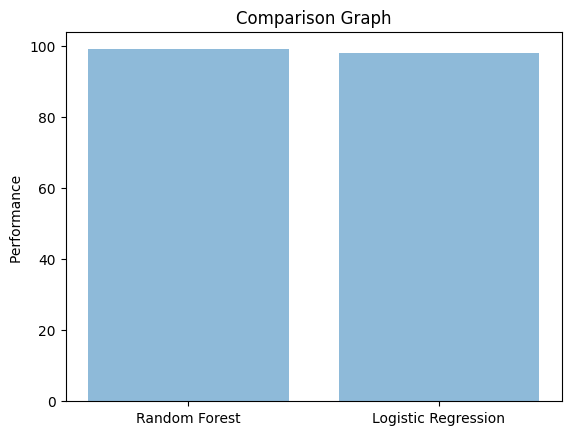

In [10]:
#========================== VISUALIZATION ==============================

import matplotlib.pyplot as plt
import numpy as np

objects = ('Random Forest', 'Logistic Regression')
y_pos = np.arange(len(objects))
performance = [accu_rf,acc_lr]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Performance ')
plt.title('Comparison Graph')
plt.show()
print()

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix=confusion_matrix(y_test, pred_lr)
print(cf_matrix)
print()

[[ 9  0  0]
 [ 1 18  1]
 [ 0  0 69]]



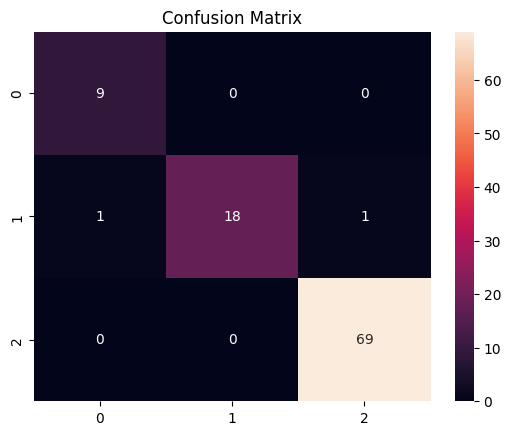

In [12]:
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix")
plt.show()
print()

<AxesSubplot:>

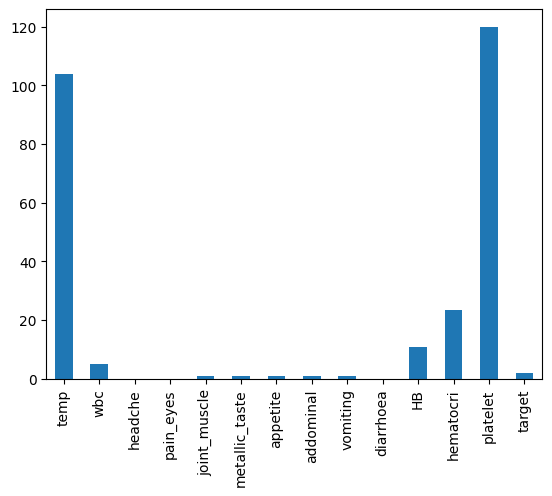

In [13]:
data_frame.iloc[14].plot(kind='bar')

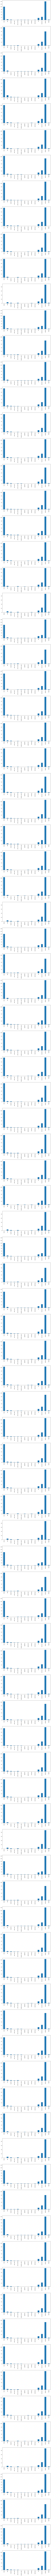

In [20]:
n = 100  # Number of plots

fig, axes = plt.subplots(n, 1, figsize=(10, n * 5))  # Adjust the figsize as needed

for i, ax in enumerate(axes):
    data_frame.iloc[i].plot.bar(ax=ax)

plt.tight_layout()  # Adjust the spacing between plots
plt.show()

# n=100
# for i in range(n):
#     plt.figure()  # Create a new figure for each plot
#     data_frame.iloc[i].plot.bar()
#     plt.show()
#data_frame.iloc[1].plot.bar()